# Data analysis of NetsurfP training datasets

First of all, the sequence lengths of the datasets are inspected, since the ESM1b embeddings works best with residue sequences that are below 1024 and 500.

**Loading of libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Loading dataset(s)

In [5]:
hhblits = np.load('/home/eryk/development/NSPThesis/data/nsp2/training_data/Train_HHblits.npz')['data']

## Sequence length distribution

Count the sequences and then plot the distribution as a histogram

In [3]:
def count_sequences(data):
    """Counts the sequences in given data"""
    hist = {}
    for seq in data:
        idx = sum(seq)
        hist[idx] = hist.get(idx, 0) + 1
    return hist

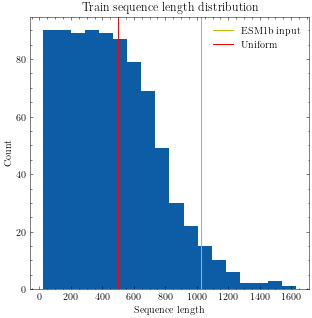

In [14]:
# Plot hhblits
plt.style.use('science')

hhblits_count = count_sequences(hhblits[:, :, 50])

plt.rcParams["figure.figsize"]=(5, 5)
n, bins, patches = plt.hist(x=hhblits_count, bins='auto')
plt.xlabel('Sequence length')
plt.ylabel('Count')
plt.title('Train sequence length distribution')
plt.axvline(x=1024, label='ESM1b input', c='y')
plt.axvline(x=500, label='Uniform', c='r')
plt.legend(loc='upper right')
plt.show()

**How many sequences are removed if lengths are reduced to only keep below 1024 and 600?**

In [15]:
total = sum(hhblits_count.values())

# lamda filter that filters out the keys
filter_total = lambda x, y: dict([ (i,x[i]) for i in x if i < y ])

# count if the sequences are reduced
reduce_1024 = sum(filter_total(hhblits_count, 1024).values())
reduce_500 = sum(filter_total(hhblits_count, 500).values())

print("total:", total)
print("<1024:", total-reduce_1024)
print("<500:", total-reduce_500)

total: 10848
<1024: 34
<500: 782


In [13]:
hhblits = hhblits[np.sum(hhblits[:, :, 50], axis=1) < 500]

In [14]:
hhblits.shape

(10066, 1632, 68)

In [15]:
np.savez_compressed("/home/eryk/development/NSPThesis/data/nsp2/training_data/Train_HHblits_500.npz", data=hhblits[:, :500, :])
np.savez_compressed("/home/eryk/development/NSPThesis/data/nsp2/training_data/Train_HHblits_500_small.npz", data=hhblits[:1000, :500, :])

# Distribution of secondary structure and disorder

## Secondary structure

In [3]:
hhblits = np.load("/home/eryk/development/NSPThesis/data/nsp2/training_data/Train_HHblits_small.npz")['data']

In [4]:
mask = hhblits[:, :, 50]== 1
q8 = np.argmax(hhblits[:, :, 57:65], axis=2)[mask]

In [5]:
q8 = np.array(["GHIBESTC"[int(r)] for r in q8.flatten()])

In [6]:
unique, counts = np.unique(q8, return_counts=True)
dict(zip(unique, counts))

{'B': 2535,
 'C': 58465,
 'E': 52717,
 'G': 9243,
 'H': 76883,
 'I': 1160,
 'S': 20034,
 'T': 26257}

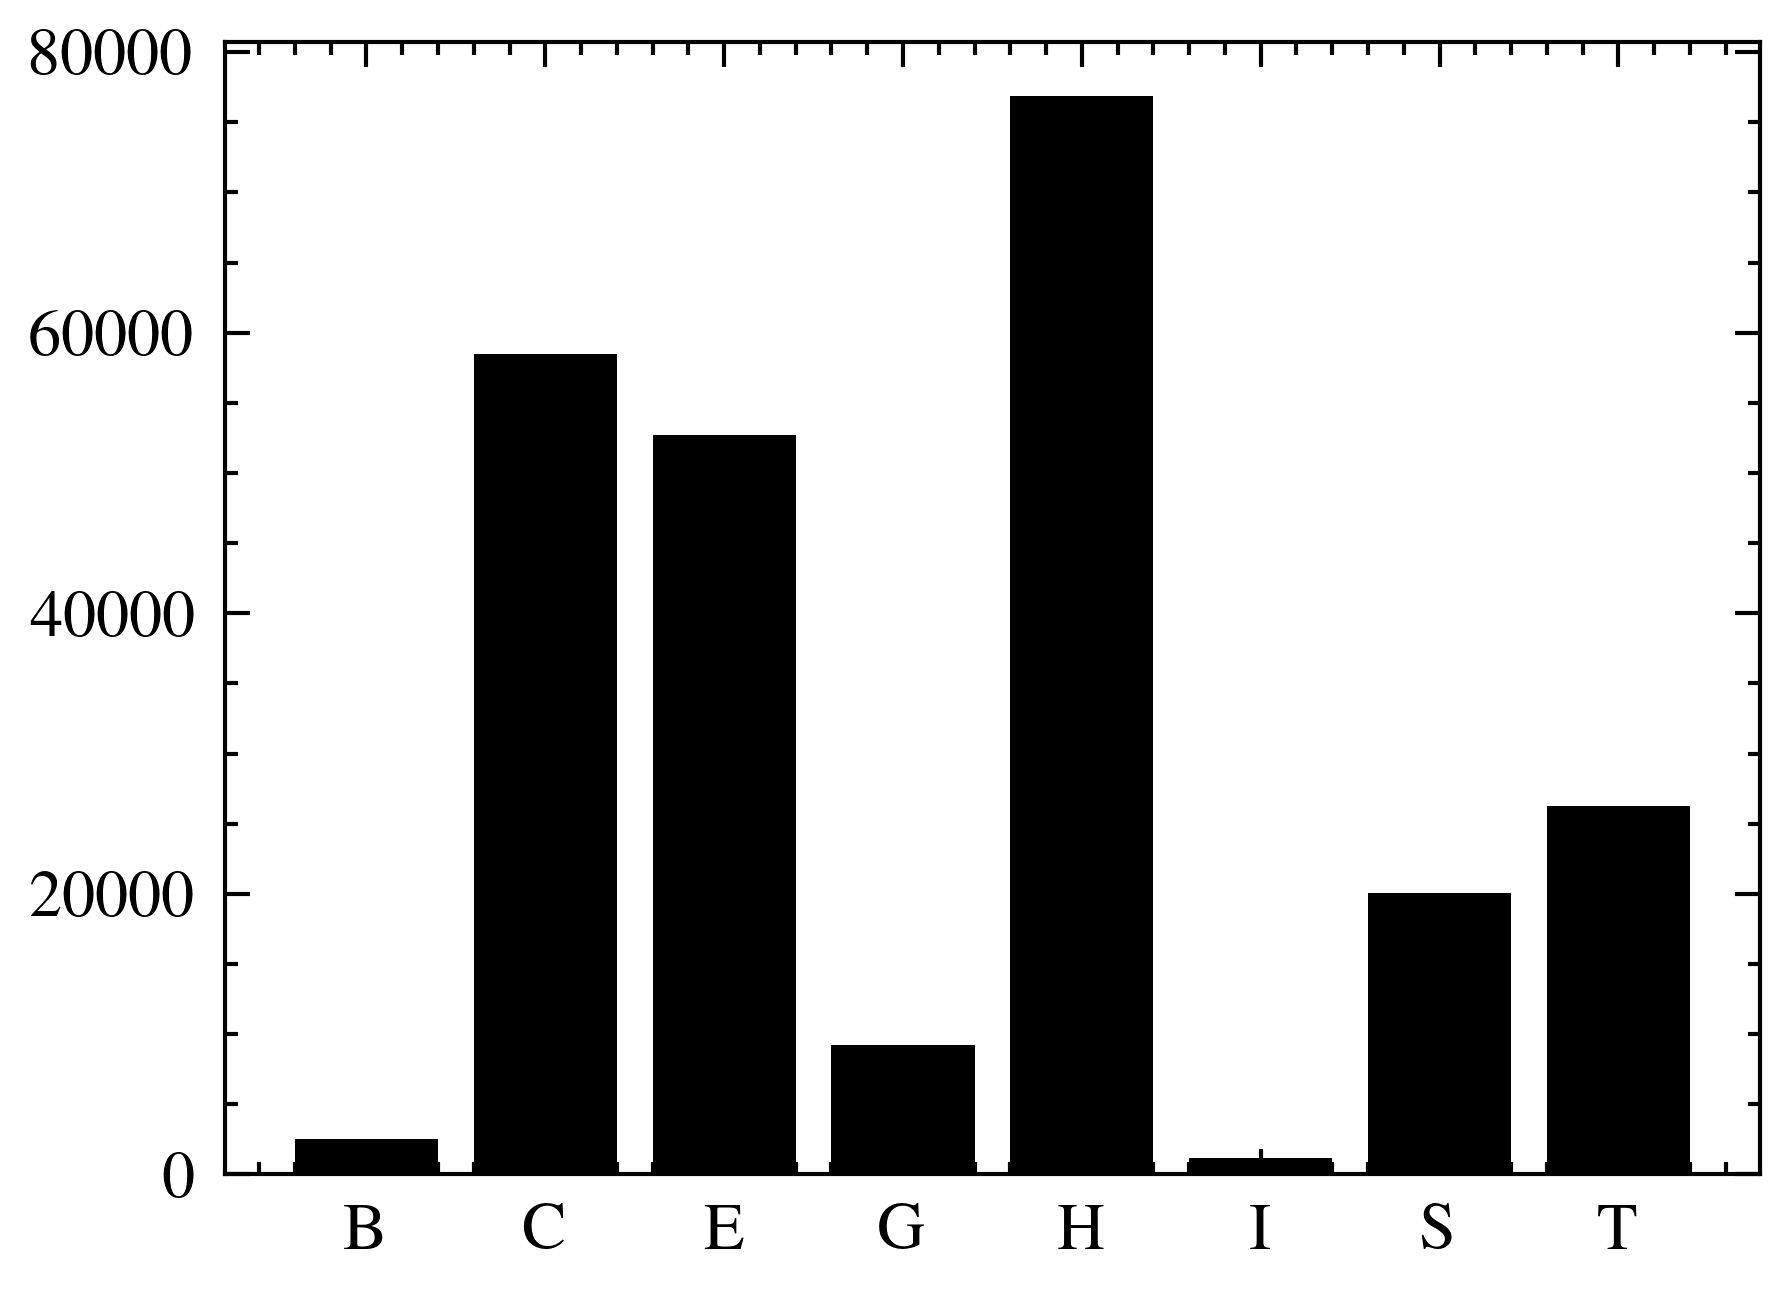

In [7]:
with plt.style.context(['science', 'ieee']):
    plt.bar(unique, counts, align='center')
    plt.gca().set_xticks(unique)
    plt.show()

In [8]:
import math
def normalize(d, target=1):
    raw = sum(d.values())
    factor = target/raw
    return {key:round(-math.log(value*factor),2) for key,value in d.items()}

In [9]:
weights = normalize(dict(zip(unique, counts)))

In [10]:
weights = [weights[c] for c in "GHIBESTC"]

In [11]:
weights

[3.29, 1.17, 5.36, 4.58, 1.55, 2.51, 2.24, 1.44]

## Disorder

In [12]:
mask = hhblits[:, :, 50]== 1
disorder = hhblits[:, :, 51][mask]

In [13]:
disorder

array([0., 0., 0., ..., 1., 1., 1.])

In [14]:
unique, counts = np.unique(disorder, return_counts=True)
dict(zip(unique, counts))

{0.0: 11485, 1.0: 235809}

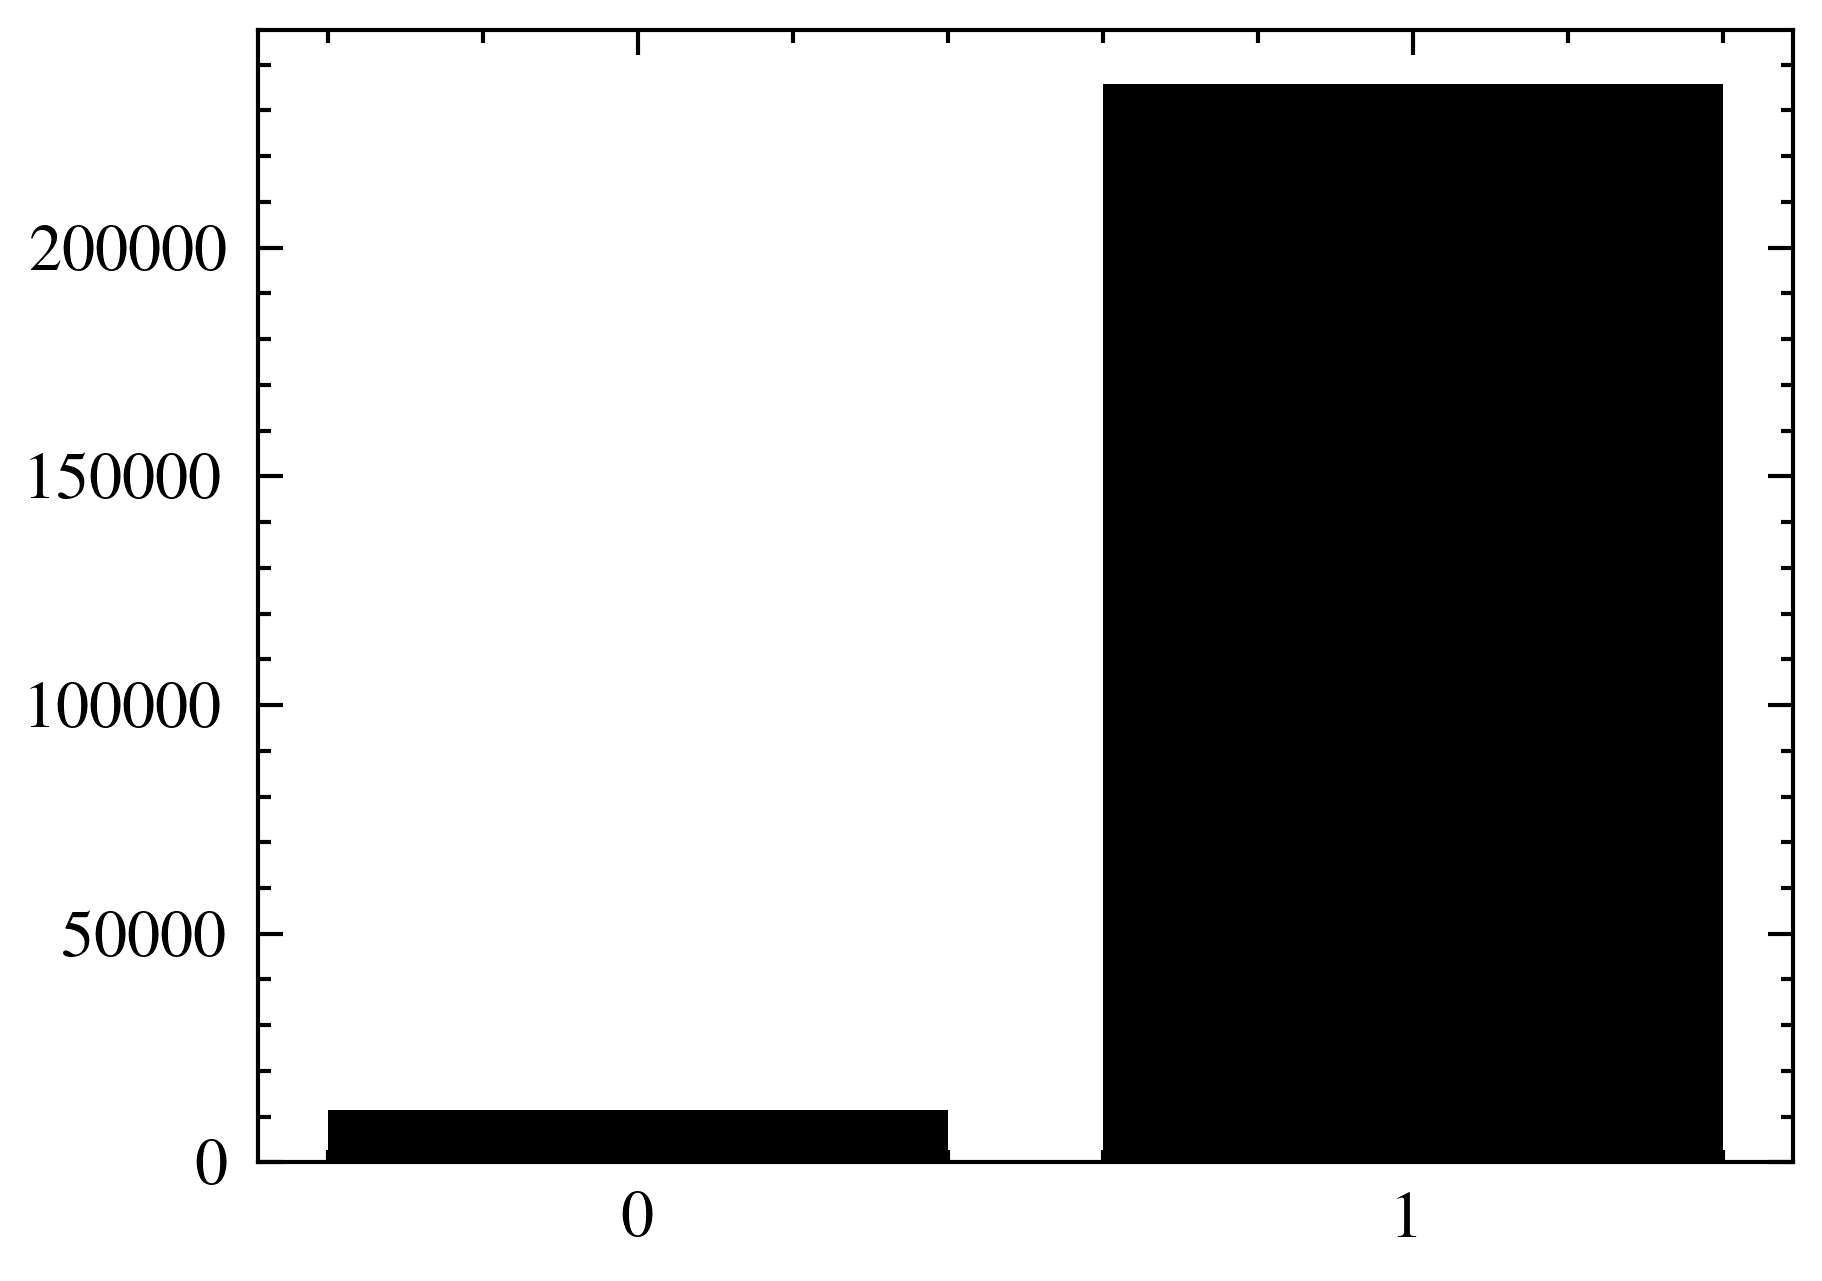

In [15]:
with plt.style.context(['science', 'ieee']):
    plt.bar(unique, counts, align='center')
    plt.gca().set_xticks(unique)
    plt.show()

In [22]:
import math
def normalize(d, target=1):
    raw = sum(d.values())
    factor = target/raw
    return {key:round(-math.log(value*factor),2) for key,value in d.items()}

In [23]:
weights = normalize(dict(zip(unique, counts)))

In [24]:
weights

{0.0: 3.07, 1.0: 0.05}